In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("fueltype.csv")
data = data.loc[:,("brand","bodyType","year","transmission","power","fuelType")]


In [4]:
data

,brand,bodyType,year,transmission,power,fuelType
0,Toyota,jeep 5 doors,1995.0,AT,130.0,Diesel
1,Toyota,jeep 5 doors,NaN,Automatic,286.0,Diesel
2,Toyota,hatchback 5 doors,2019.0,CVT,95.0,Gasoline
3,Toyota,sedan,2002.0,AT,160.0,Gasoline
4,Toyota,jeep 5 doors,2010.0,AT,170.0,Gasoline
...,...,...,...,...,...,...
1498735,Toyota,station wagon,NaN,AT,260.0,Gasoline
1498736,Honda,jeep 3 doors,1998.0,CVT,105.0,Gasoline
1498737,Mazda,jeep 5 doors,2006.0,AT,244.0,Gasoline
1498738,Mitsubishi,jeep 5 doors,2012.0,CVT,139.0,Gasoline


In [5]:
data.shape

(1498740, 6)

In [6]:
data.dtypes

brand            object
bodyType         object
year            float64
transmission     object
power           float64
fuelType         object
dtype: object

In [7]:
data.describe()

,year,power
count,915699.000000,1.484500e+06
mean,2005.327732,1.588104e+02
std,8.206993,7.169883e+01
min,1953.000000,4.500000e+01
25%,1999.000000,1.070000e+02
50%,2006.000000,1.400000e+02
75%,2012.000000,1.850000e+02
max,2021.000000,6.500000e+02


In [8]:
#how many nulls
print(data.isnull().sum())

brand                0
bodyType             0
year            583041
transmission      7401
power            14240
fuelType          6595
dtype: int64


In [9]:
data.dropna(inplace=True)

In [10]:
#how many nulls
print(data.isnull().sum())

brand           0
bodyType        0
year            0
transmission    0
power           0
fuelType        0
dtype: int64


In [11]:
data.duplicated()

0          False
2          False
3          False
4          False
8          False
           ...  
1498734     True
1498736     True
1498737     True
1498738     True
1498739     True
Length: 915059, dtype: bool

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.duplicated()

0          False
2          False
3          False
4          False
8          False
           ...  
1492463    False
1492475    False
1494056    False
1494061    False
1497238    False
Length: 1613, dtype: bool

In [14]:
data

,brand,bodyType,year,transmission,power,fuelType
0,Toyota,jeep 5 doors,1995.0,AT,130.0,Diesel
2,Toyota,hatchback 5 doors,2019.0,CVT,95.0,Gasoline
3,Toyota,sedan,2002.0,AT,160.0,Gasoline
4,Toyota,jeep 5 doors,2010.0,AT,170.0,Gasoline
8,Hummer,jeep 5 doors,2002.0,AT,315.0,Gasoline
...,...,...,...,...,...,...
1492463,GAZ,sedan,2006.0,Manual,137.0,Gasoline
1492475,Mitsubishi,minivan,1997.0,AT,125.0,Diesel
1494056,Toyota,hatchback 5 doors,2012.0,CVT,105.0,Gasoline
1494061,Nissan,hatchback 5 doors,2006.0,AT,109.0,Gasoline


In [15]:
data[['year','power']] = data[['year','power']].astype(int)


In [16]:
data

,brand,bodyType,year,transmission,power,fuelType
0,Toyota,jeep 5 doors,1995,AT,130,Diesel
2,Toyota,hatchback 5 doors,2019,CVT,95,Gasoline
3,Toyota,sedan,2002,AT,160,Gasoline
4,Toyota,jeep 5 doors,2010,AT,170,Gasoline
8,Hummer,jeep 5 doors,2002,AT,315,Gasoline
...,...,...,...,...,...,...
1492463,GAZ,sedan,2006,Manual,137,Gasoline
1492475,Mitsubishi,minivan,1997,AT,125,Diesel
1494056,Toyota,hatchback 5 doors,2012,CVT,105,Gasoline
1494061,Nissan,hatchback 5 doors,2006,AT,109,Gasoline


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#هحولهم لأرقام
data.brand = le.fit_transform(data.brand)
data.transmission = le.fit_transform(data.transmission)
data.bodyType = le.fit_transform(data.bodyType)
data.fuelType = le.fit_transform(data.fuelType)

In [18]:
data

,brand,bodyType,year,transmission,power,fuelType
0,34,4,1995,0,130,0
2,34,2,2019,1,95,1
3,34,9,2002,0,160,1
4,34,4,2010,0,170,1
8,13,4,2002,0,315,1
...,...,...,...,...,...,...
1492463,10,9,2006,2,137,1
1492475,25,6,1997,0,125,0
1494056,34,2,2012,1,105,1
1494061,27,2,2006,0,109,1


In [19]:
#decisionTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib as plt

In [20]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
#by entropy
dt = DecisionTreeClassifier(criterion="entropy")
#training
dt.fit(x_train,y_train)
#predict
pred = dt.predict(x_test)

In [23]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.9226006191950464


In [24]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


(process:4744): GLib-GIO-WARNING **: 23:23:26.516: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.8.3.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs


(process:12256): GLib-GIO-WARNING **: 23:23:30.477: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.8.3.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

(process:12256): GLib-GIO-WARNING **: 23:23:31.093: Unexpectedly, UWP app `Microsoft.OutlookForWindows_1.2023.1114.100_x64__8wekyb3d8bbwe' (AUMId `Microsoft.OutlookForWindows_8wekyb3d8bbwe!Microsoft.OutlookforWindows') supports 1 extensions but has no verbs



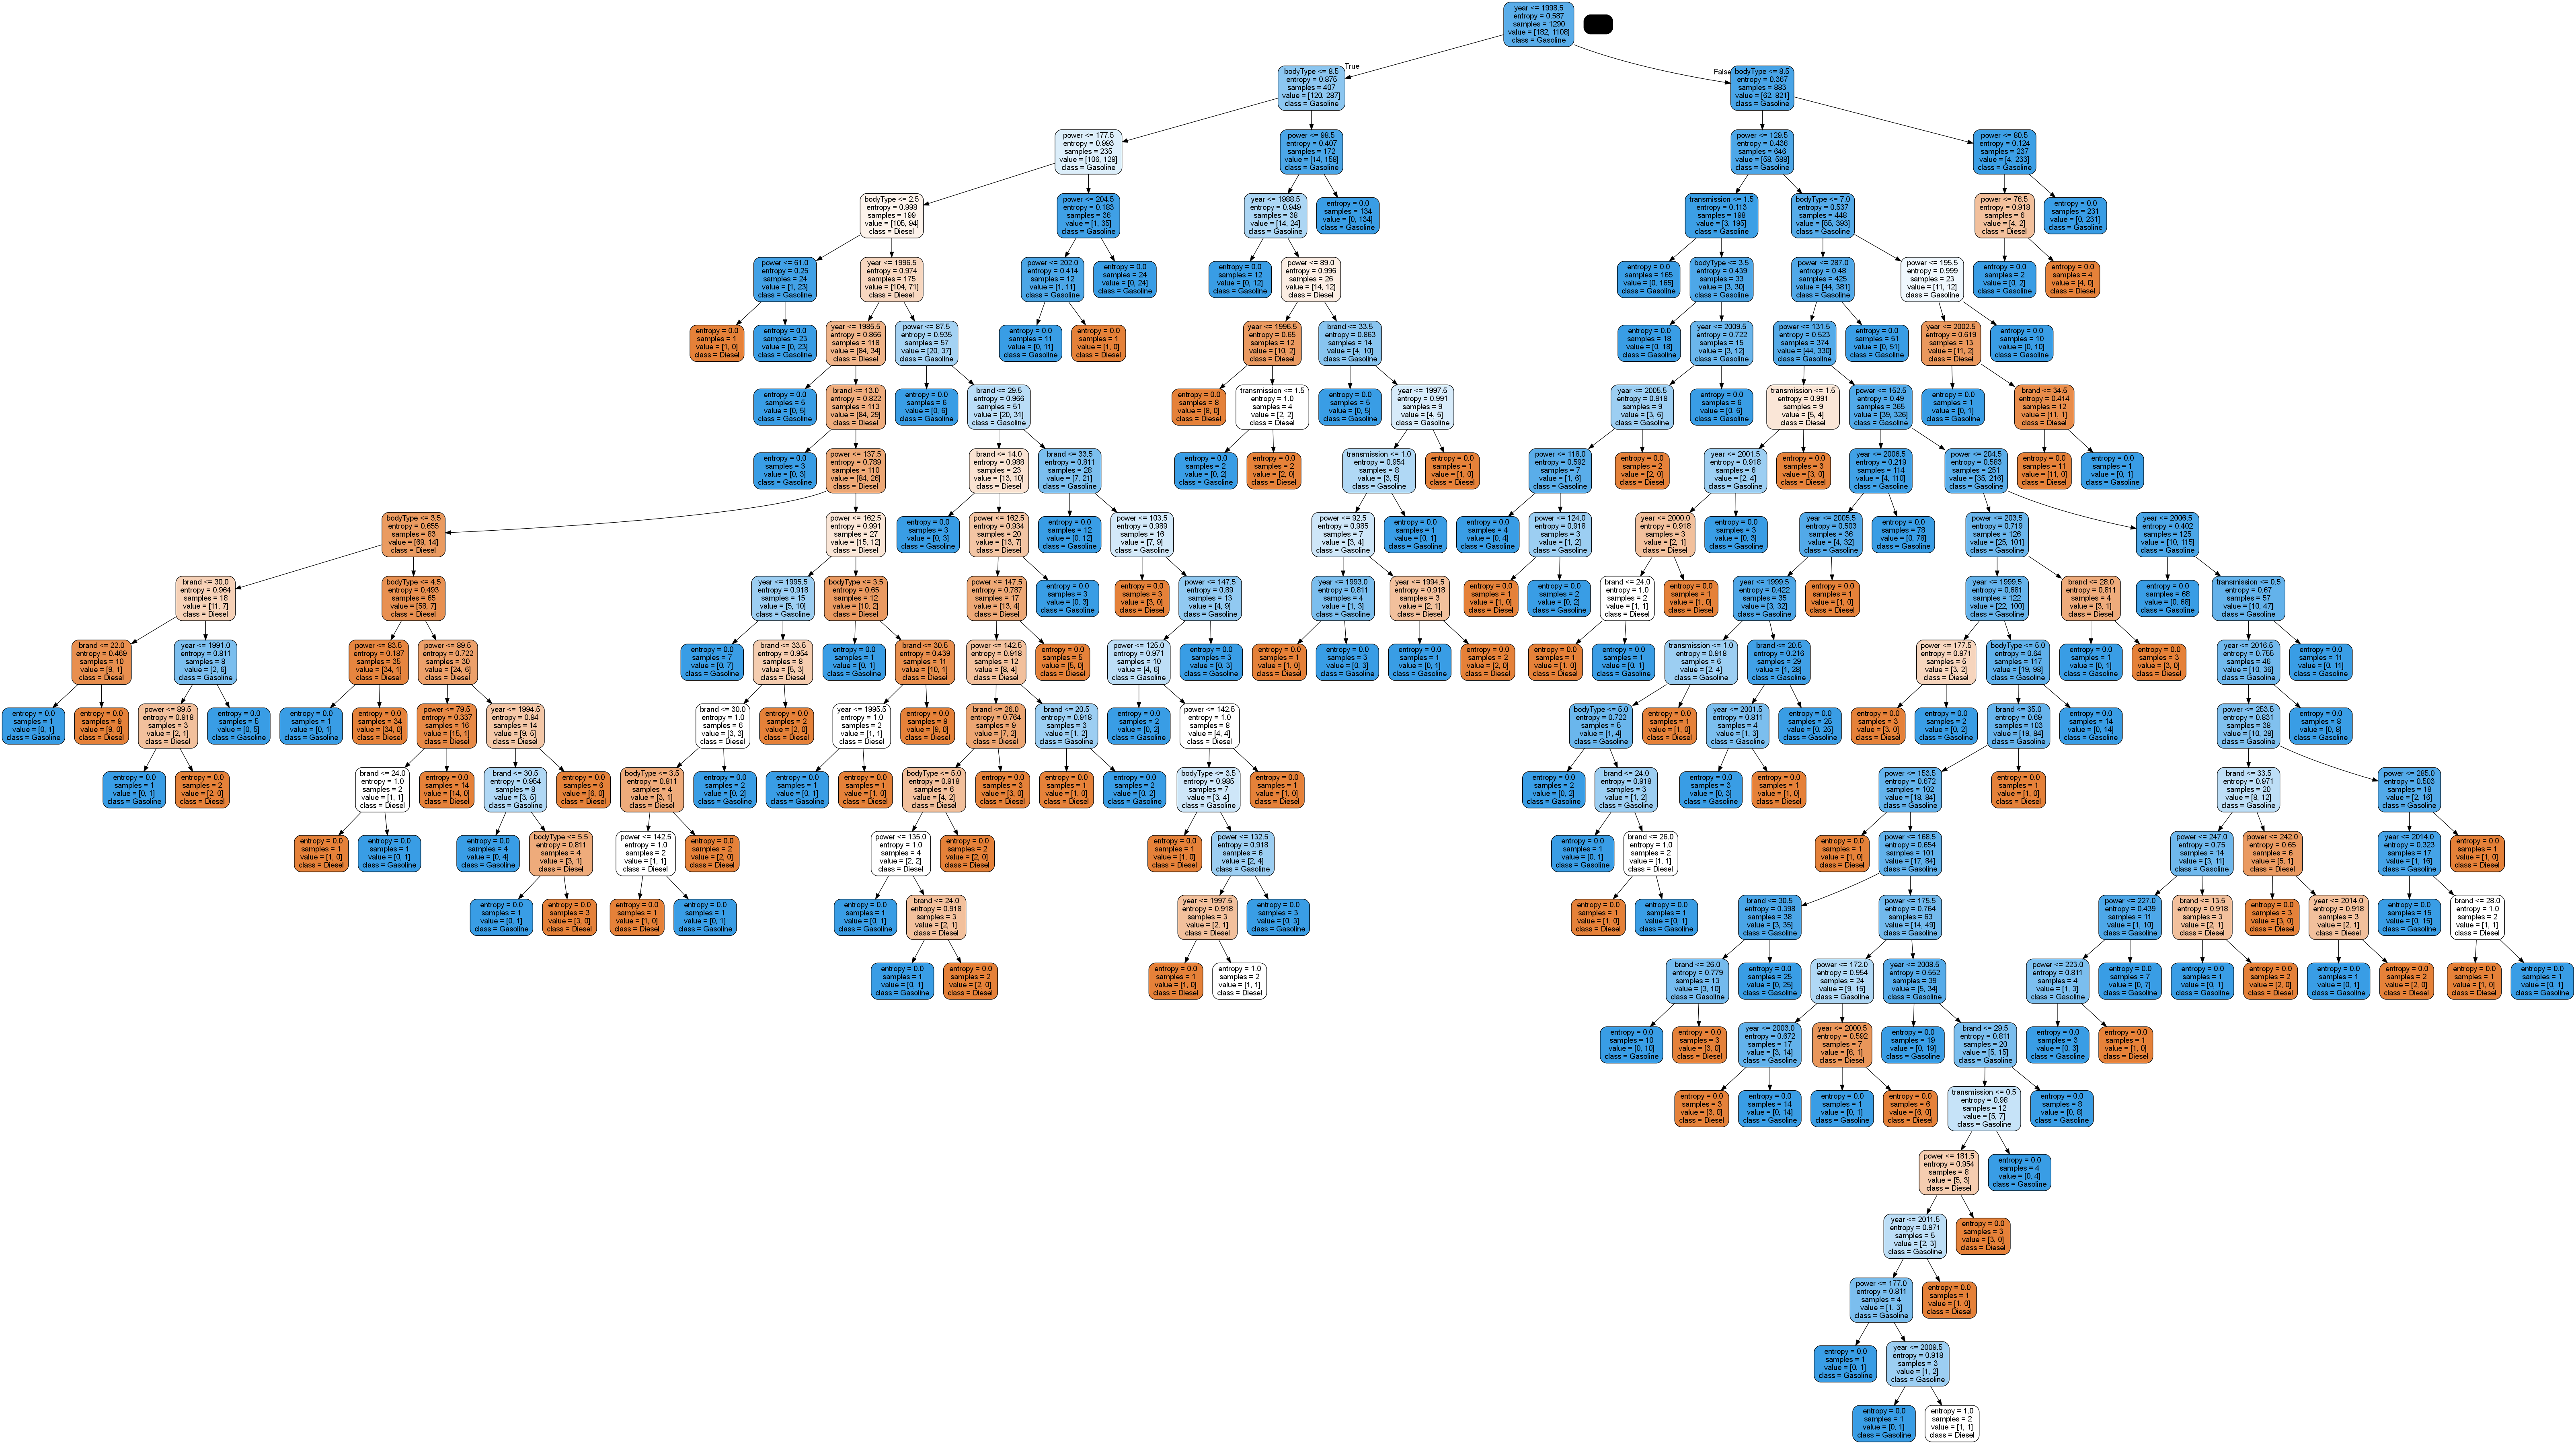

In [25]:
dots=StringIO()
export_graphviz(dt,out_file=dots,filled=True,rounded=True,feature_names= x.columns,class_names=["Diesel","Gasoline"])
graph =  pydotplus.graph_from_dot_data(dots.getvalue())
graph.write_png("tree.png")
Image(graph.create_png())

In [26]:
#Knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [27]:
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [28]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.913312693498452


In [29]:
##stacking
from sklearn.ensemble import StackingClassifier

from sklearn.linear_model import LogisticRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                                test_size=1/3, 
                                                              )
base_estimators = [
  ('dt', dt),
    ('knn', knn)
]
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=LogisticRegression())

abc=stacking_clf.fit(x_train, y_train)
a= abc.predict(x_test)

print("Accuracy:", accuracy_score(y_test, a))


Accuracy: 0.9237918215613383


In [34]:
##bagging1
from sklearn.model_selection import cross_val_score, cross_validate, RepeatedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from ensemble_functions import *



In [78]:
def eval_bag_est_range(the_est, n_reps, est_range, folds = 10):
    n_est_dict = {}
    for n_est in est_range: 
        the_bag = BaggingClassifier(the_est, 
                            n_estimators = n_est,
                            max_samples = 1.0, 
                            bootstrap = True)
        bag_cv = cross_validate(the_bag, x,y, n_jobs=-1,
                                cv=RepeatedKFold(n_splits=folds, n_repeats=n_reps)) 
        n_est_dict[n_est]=bag_cv['test_score'].mean()
    return n_est_dict

In [79]:

kNNpipe  = Pipeline(steps=[ ('classifier', knn)])

dtPipe = Pipeline(steps=[  ('classifier', dt)])

In [80]:
res_dt_bag = eval_bag_est_range(dtPipe, 10, range(2,16))

In [81]:
res_dt_bag

{2: 0.8833877770109655,
 3: 0.9144425274135419,
 4: 0.9097350663292693,
 5: 0.9205777931140249,
 6: 0.91872364082509,
 7: 0.9234345525649872,
 8: 0.9233766582317305,
 9: 0.9266551644812513,
 10: 0.9258507783145462,
 11: 0.9239314469749254,
 12: 0.9244789510006902,
 13: 0.9267782378651945,
 14: 0.9269082125603866,
 15: 0.926334636914347}

In [82]:
res_kNN_bag  = eval_bag_est_range(kNNpipe, 10, range(2,16))


In [83]:
res_kNN_bag

{2: 0.8995797868261635,
 3: 0.9089279963193004,
 4: 0.9073767349129668,
 5: 0.9070009968560693,
 6: 0.9104209799861972,
 7: 0.911532474503489,
 8: 0.9096008741660916,
 9: 0.912583774250441,
 10: 0.9097910436316233,
 11: 0.911286327735603,
 12: 0.9129403419983129,
 13: 0.9123284257342228,
 14: 0.9107844490453185,
 15: 0.9123291925465838}

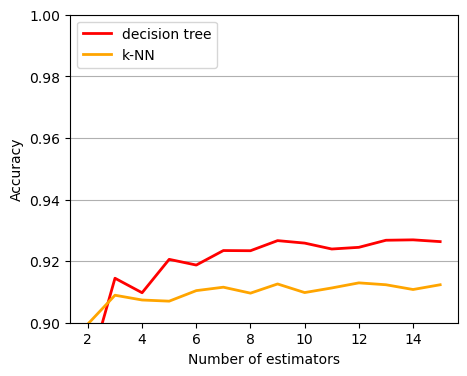

In [84]:
import matplotlib.pyplot as plt

kNN_list = sorted(res_kNN_bag.items())
nc, kNN_accs = zip(*kNN_list) 
dt_list = sorted(res_dt_bag.items()) 
nc, dt_accs = zip(*dt_list) 

f = plt.figure(figsize=(5,4))

plt.plot(nc, dt_accs, lw = 2, color = 'r', label = 'decision tree')
plt.plot(nc, kNN_accs, lw = 2, color = 'orange', label = 'k-NN')

plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.ylim([0.90,1])
plt.legend(loc = 'upper left')
plt.grid(axis = 'y')
f.savefig('bag-est-plot.pdf')

In [85]:
clf_dict = {}
clf_dict['dt'] = dt


clf_dict['knn'] = knn


clf_acc = {}
bag_acc = {}
folds, n_reps = 10,10
n_est = 2
v = 0
for c_name in clf_dict.keys():
    pipe  = Pipeline(steps=[
                           ('classifier', clf_dict[c_name])])
    clf_cv = cross_validate(pipe, x, y, n_jobs=-1,
                                    cv=RepeatedKFold(n_splits=folds, n_repeats=n_reps))

    the_bag = BaggingClassifier(pipe, 
                            n_estimators = n_est,
                            max_samples = 1.0, # bootstrap resampling 
                            bootstrap = True)
    bag_cv = cross_validate(the_bag, x, y, n_jobs=-1,
                                    cv=RepeatedKFold(n_splits=folds, n_repeats=n_reps))
    
    clf_acc[c_name] = clf_cv['test_score'].mean()
    bag_acc[c_name] = bag_cv['test_score'].mean()
    print("Mean for {:s} {:.2f}".format(c_name, clf_cv['test_score'].mean()))
    print("Mean for {:s} bag {:.2f}".format(c_name, bag_cv['test_score'].mean()))

Mean for dt 0.91
Mean for dt bag 0.88
Mean for knn 0.91
Mean for knn bag 0.90


In [86]:
print(clf_acc)



{'dt': 0.913268154282647, 'knn': 0.9102986734146153}


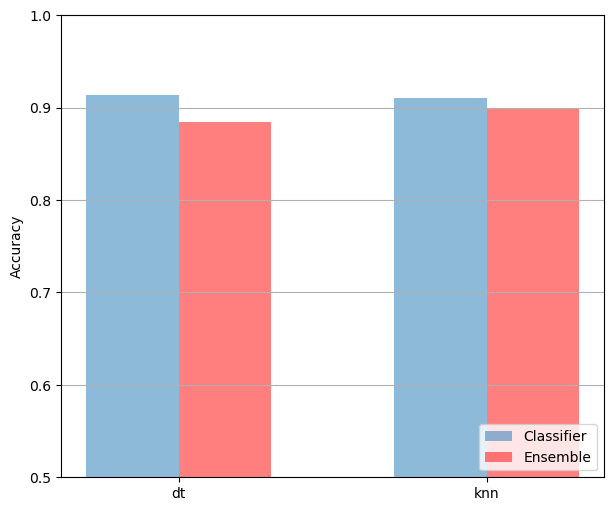

In [89]:
import numpy as np
names = clf_dict.keys()
y_pos = np.arange(len(names))
f = plt.figure(figsize=(7,6))
plt.bar(y_pos-0.15, clf_acc.values(), align='center', width = 0.3, alpha=0.5, 
        label = "Classifier")
plt.bar(y_pos+0.15, bag_acc.values(), align='center', color = 'r', width = 0.3, alpha=0.5,
       label = "Ensemble")
plt.xticks(y_pos, names)
plt.ylabel('Accuracy')
#plt.xlabel(x_lab)
#plt.title(title)
plt.ylim((0.5,1))
plt.grid(axis = 'y')
plt.legend(loc = 'lower right')
plt.show()
f.savefig('bag-est-bar.pdf')

In [94]:
##bagging2
tree_bag = BaggingClassifier(base_estimator=dt)
knn_bag = BaggingClassifier(base_estimator=knn)

base_estimators = [
    ('tree', tree_bag),
    ('knn',knn_bag)
]

stacking_clf = StackingClassifier(
    estimators=base_estimators,
    final_estimator=LogisticRegression()  
)
abc=stacking_clf.fit(x_train, y_train)
a= abc.predict(x_test)

print("Accuracy:", accuracy_score(y_test, a))

C:\Users\AlDawlia\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\AlDawlia\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\AlDawlia\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\AlDawlia\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\AlDawlia\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\AlDawlia\an

Accuracy: 0.9256505576208178


In [97]:
##bagging by RF
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 0)
model.fit(x_train, y_train)
print(accuracy_score(y_test, model.predict(x_test)))

0.9163568773234201
